In [12]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [13]:
#graphing functions
def plotGenotype_2D(graphInfo, title="Genotype Generation plot"):
    fig=plt.figure()
    plt.plot(graphInfo["xPlots"],graphInfo["WPlots"],'b-')
    plt.plot(graphInfo["xPlots"],graphInfo["DPlots"],'r-')
    plt.plot(graphInfo["xPlots"],graphInfo["HPlots"],'m-')
    plt.axis([0,len(graphInfo["xPlots"]),0,1])
    plt.show()
def plotAllele_2D(graphInfo, title="Allele Generation Plot"):
    fig=plt.figure()
    plt.plot(graphInfo["xPlots"],graphInfo["wPlots"],'b-')
    plt.plot(graphInfo["xPlots"],graphInfo["dPlots"],'r-')
    plt.axis([0,len(graphInfo["xPlots"]),0,1])
    plt.show()
def model_3D(X,Y,Z,xLabel,yLabel, title):
    #3D graph
    import matplotlib.pyplot as plt
    from matplotlib import cm
    min=1000
    max=-1000
    for rIndex in range(len(Z)):
        for cIndex in range(len(Z[rIndex])):
            if Z[rIndex][cIndex]<min:
                min=Z[rIndex][cIndex]
            if Z[rIndex][cIndex]>max:
                max=Z[rIndex][cIndex]
    if min<-max:
        max=-min
    else:
        min=-max
    
    #label axes
    plt.xlabel(xLabel, fontdict=None, labelpad=None)
    plt.ylabel(yLabel, fontdict=None, labelpad=None)
    plt.title(title)

    
    plt.axis(aspect='image');
    plt.imshow(Z, origin='lower', extent=([0, 1, 0, 1]), vmax=max, vmin=min, cmap=cm.coolwarm)
    plt.show()

In [14]:
#model functions
def update_vars(oldDataDict, newDataDict):
    for key in newDataDict.keys():
        oldDataDict[key]=newDataDict[key]
    return oldDataDict
def run_generation_iX(simData):
    w=simData['qW']
    d=simData['qD']
    fW=simData['fW']
    fD=simData['fD']
    h=simData['h']
    fH=fW*(1-h)+fD*h
    eW=simData['eW']
    a=simData['a']
    if simData['curGen']<=simData['induceStart']:
        eD=simData['eD']
    else:
        eD=simData['eD']*(1-a)+simData['eDP']*a
    #prevent redundant multiplication and create less rounding errors
    w2=w*w
    wd=w*d
    d2=d*d
    #ed2=eD because of the way finn and I discussed
    ed2=eD
    edew=eD*eW
    ednew=eD*(1-eW)
    nedew=(1-eD)*eW
    nednew=(1-eD)*(1-eW)
    
    fBar=1-((1-fW)*(w2+2*wd*ednew)+(1-fD)*(d2*(1-ed2)+2*wd*nedew)+(1-fH)*(2*wd*nednew)+d2*ed2+2*wd*edew)
    wPrime=(w2+2*wd*ednew)*fW + (wd*nednew)*fH
    dPrime=(d2*(1-ed2)+2*wd*nedew)*fD + (wd*nednew)*fH
    
    #wPrime=(fW*w2+fH*(wd*(1-e)))/fBar
    #dPrime=(fD*(d2+2*wd*e)+fH*(wd*(1-e)))/fBar
    #print({'w':wPrime, 'd':dPrime,'fB':1-fBar})
    #print(wPrime+dPrime+(1-fBar))
    wPrime/=fBar
    dPrime/=fBar
    
    #remove rounding errors
    total=wPrime+dPrime
    if total!=1:
        wPrime/=total
        dPrime/=total

    fBar=1-(d2*eD*eD)
    homoW=(w2+2*wd*eD*(1-eW))/fBar
    homoD=(d2*(1-eD*eD)+2*wd*(1-eD)*eW)/fBar
    heterozygote=(2*wd*(1-eD)*(1-eW))/fBar
    
    #print(str(simData['curGen'])+' '+str(heterozygote))
    return {'qW':wPrime,'qD':dPrime,'WW':homoW,'DD':homoD,'WD':heterozygote}

    
def run_simulation_iX(simData,graph=False,debug=False):
    graphInfo={"xPlots": [0], "WPlots": [simData['qW']], "DPlots": [simData['qD']], "HPlots": [0], "wPlots":[simData['qW']], "dPlots":[simData['qD']]}
    w=simData['qW']*simData['fW']
    d=simData['qD']*simData['fD']
    total=w+d
    simData['qW']=w/total
    simData['qD']=d/total
    for i in range(1,simData['generations']+1):
        simData['curGen']=i
        update_vars(simData,run_generation_iX(simData))
        graphInfo['xPlots'].append(i)
        graphInfo['wPlots'].append(simData['qW'])
        graphInfo['dPlots'].append(simData['qD'])
        graphInfo['WPlots'].append(simData['WW'])
        graphInfo['DPlots'].append(simData['DD'])
        graphInfo['HPlots'].append(simData['WD'])
        if simData['qW']>.99999:
            if graph:
                plotGenotype_2D(graphInfo)
                plotAllele_2D(graphInfo)
            if debug:
                print(pd.DataFrame(graphInfo))
            return -(i**(1/4))
        elif simData['qD']>.99999:
            if graph:
                plotGenotype_2D(graphInfo)
                plotAllele_2D(graphInfo)
            if debug:
                print(pd.DataFrame(graphInfo))
            return i**(1/4)
    if graph:
        plotGenotype_2D(graphInfo)
        plotAllele_2D(graphInfo)
    if debug:
        print(pd.DataFrame(graphInfo))
    return 0

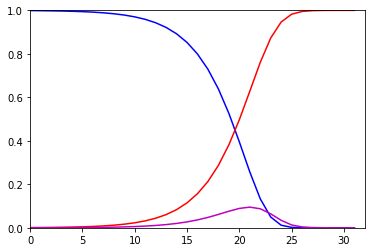

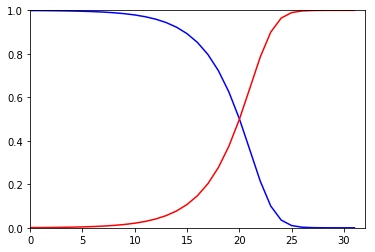

    xPlots        WPlots    DPlots    HPlots    wPlots    dPlots
0        0  9.990000e-01  0.001000  0.000000  0.999000  0.001000
1        1  9.984163e-01  0.001216  0.000304  0.998890  0.001110
2        2  9.978038e-01  0.001686  0.000421  0.998461  0.001539
3        3  9.969546e-01  0.002338  0.000584  0.997865  0.002135
4        4  9.957775e-01  0.003243  0.000809  0.997039  0.002961
5        5  9.941462e-01  0.004496  0.001122  0.995894  0.004106
6        6  9.918862e-01  0.006233  0.001554  0.994305  0.005695
7        7  9.887564e-01  0.008639  0.002152  0.992103  0.007897
8        8  9.844250e-01  0.011971  0.002977  0.989049  0.010951
9        9  9.784358e-01  0.016582  0.004116  0.984817  0.015183
10      10  9.701641e-01  0.022958  0.005682  0.978952  0.021048
11      11  9.587596e-01  0.031762  0.007830  0.970827  0.029173
12      12  9.430735e-01  0.043898  0.010762  0.959579  0.040421
13      13  9.215720e-01  0.060586  0.014739  0.944023  0.055977
14      14  8.922428e-01 

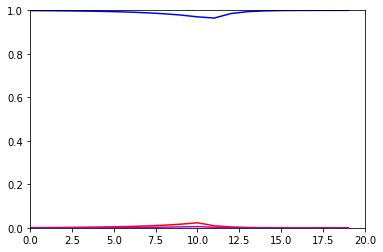

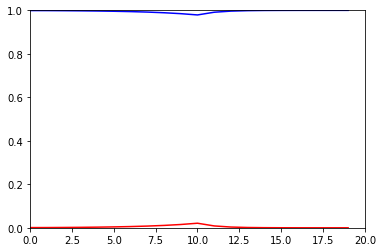

    xPlots    WPlots    DPlots    HPlots    wPlots    dPlots
0        0  0.999000  0.001000  0.000000  0.999000  0.001000
1        1  0.998416  0.001216  0.000304  0.998890  0.001110
2        2  0.997804  0.001686  0.000421  0.998461  0.001539
3        3  0.996955  0.002338  0.000584  0.997865  0.002135
4        4  0.995778  0.003243  0.000809  0.997039  0.002961
5        5  0.994146  0.004496  0.001122  0.995894  0.004106
6        6  0.991886  0.006233  0.001554  0.994305  0.005695
7        7  0.988756  0.008639  0.002152  0.992103  0.007897
8        8  0.984425  0.011971  0.002977  0.989049  0.010951
9        9  0.978436  0.016582  0.004116  0.984817  0.015183
10      10  0.970164  0.022958  0.005682  0.978952  0.021048
11      11  0.964547  0.009279  0.002267  0.991404  0.008596
12      12  0.985391  0.003785  0.000938  0.996524  0.003476
13      13  0.994072  0.001530  0.000381  0.998601  0.001399
14      14  0.997610  0.000616  0.000154  0.999438  0.000562
15      15  0.999039  0.

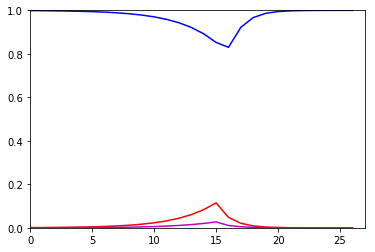

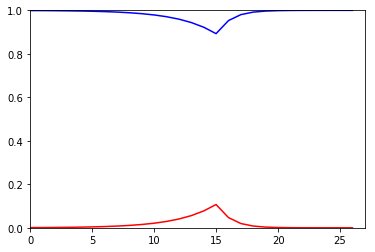

    xPlots    WPlots    DPlots    HPlots    wPlots    dPlots
0        0  0.999000  0.001000  0.000000  0.999000  0.001000
1        1  0.998416  0.001216  0.000304  0.998890  0.001110
2        2  0.997804  0.001686  0.000421  0.998461  0.001539
3        3  0.996955  0.002338  0.000584  0.997865  0.002135
4        4  0.995778  0.003243  0.000809  0.997039  0.002961
5        5  0.994146  0.004496  0.001122  0.995894  0.004106
6        6  0.991886  0.006233  0.001554  0.994305  0.005695
7        7  0.988756  0.008639  0.002152  0.992103  0.007897
8        8  0.984425  0.011971  0.002977  0.989049  0.010951
9        9  0.978436  0.016582  0.004116  0.984817  0.015183
10      10  0.970164  0.022958  0.005682  0.978952  0.021048
11      11  0.958760  0.031762  0.007830  0.970827  0.029173
12      12  0.943074  0.043898  0.010762  0.959579  0.040421
13      13  0.921572  0.060586  0.014739  0.944023  0.055977
14      14  0.892243  0.083449  0.020081  0.922539  0.077461
15      15  0.852519  0.

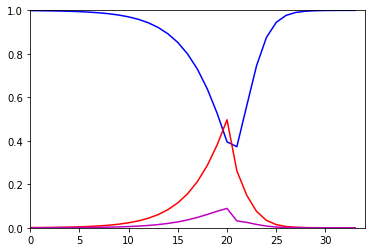

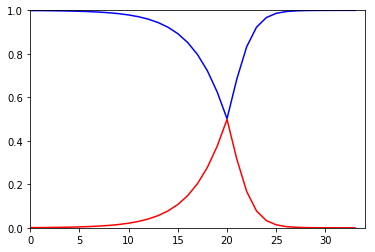

    xPlots    WPlots    DPlots    HPlots    wPlots    dPlots
0        0  0.999000  0.001000  0.000000  0.999000  0.001000
1        1  0.998416  0.001216  0.000304  0.998890  0.001110
2        2  0.997804  0.001686  0.000421  0.998461  0.001539
3        3  0.996955  0.002338  0.000584  0.997865  0.002135
4        4  0.995778  0.003243  0.000809  0.997039  0.002961
5        5  0.994146  0.004496  0.001122  0.995894  0.004106
6        6  0.991886  0.006233  0.001554  0.994305  0.005695
7        7  0.988756  0.008639  0.002152  0.992103  0.007897
8        8  0.984425  0.011971  0.002977  0.989049  0.010951
9        9  0.978436  0.016582  0.004116  0.984817  0.015183
10      10  0.970164  0.022958  0.005682  0.978952  0.021048
11      11  0.958760  0.031762  0.007830  0.970827  0.029173
12      12  0.943074  0.043898  0.010762  0.959579  0.040421
13      13  0.921572  0.060586  0.014739  0.944023  0.055977
14      14  0.892243  0.083449  0.020081  0.922539  0.077461
15      15  0.852519  0.

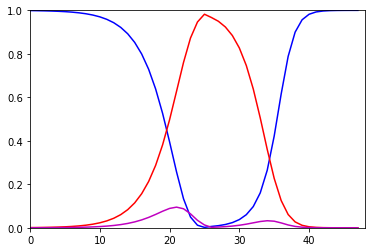

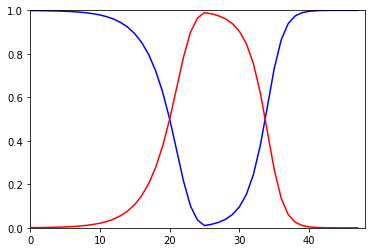

    xPlots    WPlots    DPlots    HPlots    wPlots    dPlots
0        0  0.999000  0.001000  0.000000  0.999000  0.001000
1        1  0.998416  0.001216  0.000304  0.998890  0.001110
2        2  0.997804  0.001686  0.000421  0.998461  0.001539
3        3  0.996955  0.002338  0.000584  0.997865  0.002135
4        4  0.995778  0.003243  0.000809  0.997039  0.002961
5        5  0.994146  0.004496  0.001122  0.995894  0.004106
6        6  0.991886  0.006233  0.001554  0.994305  0.005695
7        7  0.988756  0.008639  0.002152  0.992103  0.007897
8        8  0.984425  0.011971  0.002977  0.989049  0.010951
9        9  0.978436  0.016582  0.004116  0.984817  0.015183
10      10  0.970164  0.022958  0.005682  0.978952  0.021048
11      11  0.958760  0.031762  0.007830  0.970827  0.029173
12      12  0.943074  0.043898  0.010762  0.959579  0.040421
13      13  0.921572  0.060586  0.014739  0.944023  0.055977
14      14  0.892243  0.083449  0.020081  0.922539  0.077461
15      15  0.852519  0.

-2.6183304986958853

In [15]:
#accumulating rounding errors?
simData={'qW':.999,'qD':.001,'qH':0,'fW':1,'fD':.8,'h':.5,'eW':.8,'eD':.05,'eDP':.8,'a':.9,'generations':100, 'induceStart':10000}
run_simulation_iX(simData, True, True)

simData={'qW':.999,'qD':.001,'qH':0,'fW':1,'fD':.8,'h':.5,'eW':.8,'eD':.05,'eDP':.8,'a':.9,'generations':100, 'induceStart':10}
run_simulation_iX(simData,True,True)

simData={'qW':.999,'qD':.001,'qH':0,'fW':1,'fD':.8,'h':.5,'eW':.8,'eD':.05,'eDP':.8,'a':.9,'generations':100, 'induceStart':15}
run_simulation_iX(simData,True,True)

simData={'qW':.999,'qD':.001,'qH':0,'fW':1,'fD':.8,'h':.5,'eW':.8,'eD':.05,'eDP':.8,'a':.9,'generations':100, 'induceStart':20}
run_simulation_iX(simData,True,True)

simData={'qW':.999,'qD':.001,'qH':0,'fW':1,'fD':.8,'h':.5,'eW':.8,'eD':.05,'eDP':.8,'a':.9,'generations':100, 'induceStart':25}
run_simulation_iX(simData,True,True)

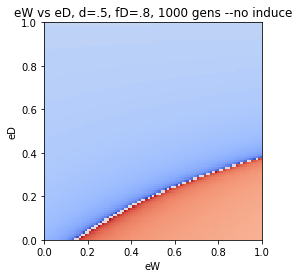

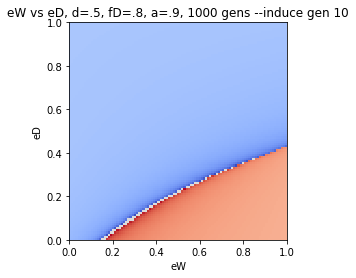

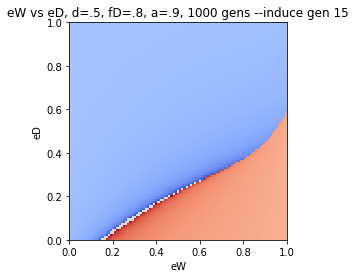

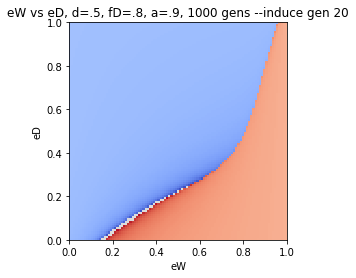

In [16]:
xVals=np.arange(0,1.01,.01)
yVals=np.arange(0,1.01,.01)
X,Y=np.meshgrid(xVals,yVals)
Z=np.zeros((len(xVals),len(yVals)))
#run 2D sim e vs f
for xIndex in range(len(xVals)):
    #x is eW
    for yIndex in range(len(yVals)):
        #y is eD
        simData={'qW':.999,'qD':.001,'qH':0,'fW':1,'fD':.8,'h':.5,'eW':xVals[xIndex],'eD':yVals[yIndex],'eDP':0,'a':0,'generations':1000, 'induceStart':10000}
        takeover=run_simulation_iX(simData)
        Z[yIndex,xIndex]=takeover
model_3D(X,Y,Z,'eW','eD','eW vs eD, d=.5, fD=.8, 1000 gens --no induce')


xVals=np.arange(0,1.01,.01)
yVals=np.arange(0,1.01,.01)
X,Y=np.meshgrid(xVals,yVals)
Z=np.zeros((len(xVals),len(yVals)))
#run 2D sim e vs f
for xIndex in range(len(xVals)):
    #x is eW
    for yIndex in range(len(yVals)):
        #y is eD
        simData={'qW':.999,'qD':.001,'qH':0,'fW':1,'fD':.8,'h':.5,'eW':xVals[xIndex],'eD':.05,'eDP':yVals[yIndex],'a':.9,'generations':1000, 'induceStart':10}
        takeover=run_simulation_iX(simData)
        Z[yIndex,xIndex]=takeover
model_3D(X,Y,Z,'eW','eD','eW vs eD, d=.5, fD=.8, a=.9, 1000 gens --induce gen 10')

xVals=np.arange(0,1.01,.01)
yVals=np.arange(0,1.01,.01)
X,Y=np.meshgrid(xVals,yVals)
Z=np.zeros((len(xVals),len(yVals)))
#run 2D sim e vs f
for xIndex in range(len(xVals)):
    #x is eW
    for yIndex in range(len(yVals)):
        #y is eD
        simData={'qW':.999,'qD':.001,'qH':0,'fW':1,'fD':.8,'h':.5,'eW':xVals[xIndex],'eD':.05,'eDP':yVals[yIndex],'a':.9,'generations':1000, 'induceStart':15}
        takeover=run_simulation_iX(simData)
        Z[yIndex,xIndex]=takeover
model_3D(X,Y,Z,'eW','eD','eW vs eD, d=.5, fD=.8, a=.9, 1000 gens --induce gen 15')

xVals=np.arange(0,1.01,.01)
yVals=np.arange(0,1.01,.01)
X,Y=np.meshgrid(xVals,yVals)
Z=np.zeros((len(xVals),len(yVals)))
#run 2D sim e vs f
for xIndex in range(len(xVals)):
    #x is eW
    for yIndex in range(len(yVals)):
        #y is eD
        simData={'qW':.999,'qD':.001,'qH':0,'fW':1,'fD':.8,'h':.5,'eW':xVals[xIndex],'eD':.05,'eDP':yVals[yIndex],'a':.9,'generations':1000, 'induceStart':20}
        takeover=run_simulation_iX(simData)
        Z[yIndex,xIndex]=takeover
model_3D(X,Y,Z,'eW','eD','eW vs eD, d=.5, fD=.8, a=.9, 1000 gens --induce gen 20')


In [17]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

xvs=np.arange(0,1.01,.01)
alphas=np.arange(0,1.01,.01)
aB,xB=np.meshgrid(alphas,xvs)
zmaxReds=np.zeros((len(xvs),len(alphas)))


induceGens=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
induceGens=np.arange(0,101,1)
for i in range(len(induceGens)):
    ig=induceGens[i]
    print('iG: '+str(ig))
    xVals=np.arange(0,1.01,.01)
    yVals=np.arange(0,1.01,.01)
    X,Y=np.meshgrid(xVals,yVals)
    Z=np.zeros((len(xVals),len(yVals)))
    #run 2D sim e vs f
    for xIndex in range(len(xVals)):
        #x is eW
        for yIndex in range(len(yVals)):
            #y is eD
            simData={'qW':.999,'qD':.001,'qH':0,'fW':1,'fD':.8,'h':.5,'eW':xVals[xIndex],'eD':.05,'eDP':yVals[yIndex],'a':.9,'generations':1000, 'induceStart':ig}
            takeover=run_simulation_iX(simData)
            Z[yIndex,xIndex]=takeover
    #model3D(X,Y,Z,'eW','eD','eW vs eD, d=.5, fD=.8, a=.9, 1000 gens --induce gen 20')
    
    
    for i in range(len(Z)):
        #print(Z[i])
        col=''
        max=0
        for j in range(len(Z[i])):
            col+=str(Z[j][i])+','
            if j>max and Z[j][i]>0:
                max=j
        col+='-'
        #print(col)
        #print(max)
        zmaxReds[ig][i]=max


iG: 0
iG: 1
iG: 2
iG: 3
iG: 4
iG: 5
iG: 6
iG: 7
iG: 8
iG: 9
iG: 10
iG: 11
iG: 12
iG: 13
iG: 14
iG: 15
iG: 16
iG: 17
iG: 18
iG: 19
iG: 20
iG: 21
iG: 22
iG: 23
iG: 24
iG: 25
iG: 26
iG: 27
iG: 28
iG: 29
iG: 30
iG: 31
iG: 32
iG: 33
iG: 34
iG: 35
iG: 36
iG: 37
iG: 38
iG: 39
iG: 40
iG: 41
iG: 42
iG: 43
iG: 44
iG: 45
iG: 46
iG: 47
iG: 48
iG: 49
iG: 50
iG: 51
iG: 52
iG: 53
iG: 54
iG: 55
iG: 56
iG: 57
iG: 58
iG: 59
iG: 60
iG: 61
iG: 62
iG: 63
iG: 64
iG: 65
iG: 66
iG: 67
iG: 68
iG: 69
iG: 70
iG: 71
iG: 72
iG: 73
iG: 74
iG: 75
iG: 76
iG: 77
iG: 78
iG: 79
iG: 80
iG: 81
iG: 82
iG: 83
iG: 84
iG: 85
iG: 86
iG: 87
iG: 88
iG: 89
iG: 90
iG: 91
iG: 92
iG: 93
iG: 94
iG: 95
iG: 96
iG: 97
iG: 98
iG: 99
iG: 100


In [18]:
holdZ=np.array(zmaxReds)

x=e, y=f, z=a


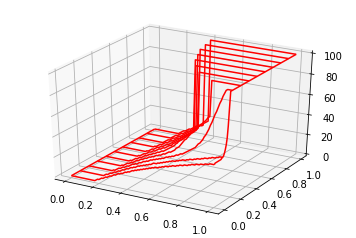

In [19]:
print("x=e, y=f, z=a")
fig = plt.figure()
ax = fig.gca(projection='3d')
zmaxReds=np.array(zmaxReds)
ax.plot_wireframe(aB, xB, zmaxReds, rstride=10, cstride=100, color='red')
plt.show()



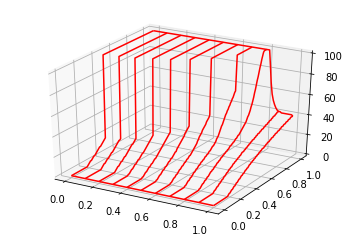

In [20]:
rot90=np.rot90(zmaxReds)
rot180=np.rot90(rot90)
rot270=np.rot90(rot180)
fig = plt.figure()
ax = fig.gca(projection='3d')
zmaxReds=np.array(zmaxReds)
ax.plot_wireframe(aB, xB, rot270, rstride=100, cstride=10, color='red')
plt.show()